# 2D Guassian PDF

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def normal(x, m, E):
    """Evaluates d-dimensional multivariate Gaussian
    
    Keyword arguments:
    x -- d x n array, containing n d-dimensional points where Gaussian will be evaluated
    m -- d-dimensional vector containing mean
    E -- n x n covariance matrix
    
    Returns:
    n-dimensional vector containing the results of evaluation
    """
    inv_E = np.linalg.inv(E)
    x_minus_mu = x - m.reshape(2,1)
        
    det_E = np.linalg.det(E)
    normalizing_coeff = 1 #(((2*np.pi)**(d/2))*(det_E**.5)) 
        
    return np.exp(-0.5 * np.dot(np.dot(x_minus_mu.T, inv_E), x_minus_mu).diagonal()) / normalizing_coeff

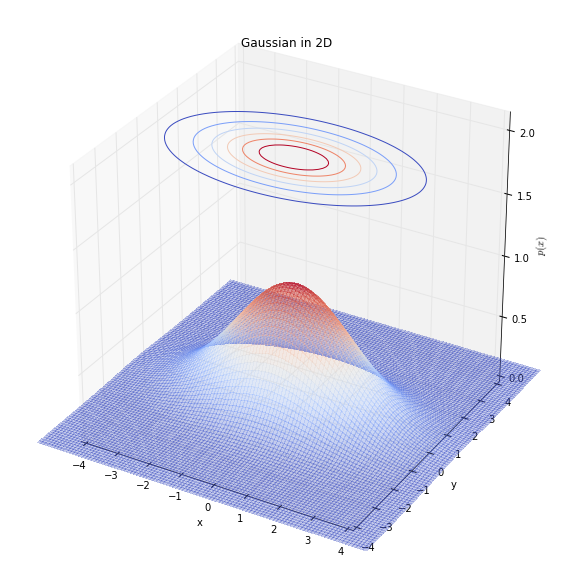

In [4]:
d = 2 # number of dimensions
E = np.array([[3,0],[0,1]]) # covariance matrix
m = np.array([0,0]).T # mea

xc = np.linspace(-5,5,100)
yc = np.linspace(-5,5,100)
xv, yv = np.meshgrid(xc,yc)
x = np.vstack((xv.ravel(), yv.ravel()))
p_of_x = normal(x, m, E)

contour_offset = 2
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xv, yv, p_of_x.reshape(100,100), rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False, alpha=.3)
cset = ax.contour(xv, yv, contour_offset+p_of_x.reshape(100,100), zdir='z', offset=contour_offset, cmap=cm.coolwarm)
ax.set_xlabel('x')
ax.set_xlim(-4, 4)
ax.set_ylabel('y')
ax.set_ylim(-4, 4)
ax.set_zlabel('$p(x)$')
ax.set_zlim(0, contour_offset+.1)
plt.title('Gaussian in 2D')
plt.show()